In [17]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import sklearn

In [58]:
# Read CSV 
data = pd.read_csv('../../Resources/bio_vars_frame.csv')
data.drop(['Unnamed: 0', 
           'Max Temperature of Warmest Month', 
           'Min Temperature of Coldest Month', 
           'Precipitation of Wettest Month', 
           'Precipitation of Driest Month', 
           'Precipitation Seasonality (Coefficient of Variation)', 
           'Mean Diurnal Range (Mean of monthly (max temp - min temp))', 
           'Temperature Annual Range', 'Annual Mean Temperature', 
           'Isothermality', 
           'Temperature Seasonality', 
           'Annual Precipitation'], axis=1, inplace=True)
data.tail(50)

Mean Temperature of Wettest Quarter  \
1684806                                212.0   
1684807                                211.0   
1684808                                211.0   
1684809                                210.0   
1684810                                210.0   
1684811                                207.0   
1684812                                208.0   
1684813                                208.0   
1684814                                202.0   
1684815                                202.0   
1684816                                202.0   
1684817                                199.0   
1684818                                197.0   
1684819                                195.0   
1684820                                195.0   
1684821                                194.0   
1684822                                194.0   
1684823                                194.0   
1684824                                193.0   
1684825                                193.0   
1684826                                193.0   
1684827                                192.0   
1684828                                193.0   
1684829                                194.0   
1684830                                193.0   
1684831                                195.0   
1684832                                195.0   
1684833                                195.0   
1684834                                192.0   
1684835                                189.0   
1684836                                188.0   
1684837                                187.0   
1684838                                186.0   
1684839                                186.0   
1684840                                185.0   
1684841                                185.0   
1684842                                185.0   
1684843                                184.0   
1684844                                184.0   
1684845                                184.0   
1684846                                184.0   
1684847                                184.0   
1684848                                185.0   
1684849                                185.0   
1684850                                185.0   
1684851                                184.0   
1684852                                189.0   
1684853                                198.0   
1684854                                201.0   
1684855                                202.0   

         Mean Temperature of Driest Quarter  \
1684806                               148.0   
1684807                               147.0   
1684808                               146.0   
1684809                               146.0   
1684810                               145.0   
1684811                               143.0   
1684812                               144.0   
1684813                               143.0   
1684814                               138.0   
1684815                               138.0   
1684816                               137.0   
1684817                               135.0   
1684818                               133.0   
1684819                               131.0   
1684820                               131.0   
1684821                               130.0   
1684822                               130.0   
1684823                               130.0   
1684824                               129.0   
1684825                               129.0   
1684826                               129.0   
1684827                               128.0   
1684828                               129.0   
1684829                               130.0   
1684830                               129.0   
1684831                               131.0   
1684832                               131.0   
1684833                               131.0   
1684834                               128.0   
1684835                               126.0   
1684836                               124.0   
1684837                               123.0   
1684838  

# Data Pre-Processing

In [59]:
X = data.drop('raster_frame', axis=1)
y = data['raster_frame']
print(X.shape, y.shape)

(1684856, 8) (1684856,)


# Model

In [60]:
# import train_test_split and split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
# import model
from sklearn.linear_model import LogisticRegression

# instantiate model
model = LogisticRegression() 

In [65]:
# fit model to the training data
model.fit(X_train, y_train)
# calculate scores of training and testing data
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
# print scores 
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')


Training Score: 0.9091768079883384
Testing Score: 0.9091079593745697


array([[-0.00782893,  0.01471778, -0.00346754, -0.03221521,  0.01402925,
        -0.01525049, -0.02424366, -0.02641906]])

In [67]:
coef = model.coef_[0]
print(coef)

[-0.00782893  0.01471778 -0.00346754 -0.03221521  0.01402925 -0.01525049
 -0.02424366 -0.02641906]


In [46]:
# y1 = y.tolist()
# y1 = np.array(y1).reshape(-1, 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=42)

In [63]:
training_prob = model.predict_proba(X_train)
testing_prob = model.predict_proba(X_test)


print(f'Training Probability: {training_prob}')
print(f'Testing Probability: {testing_prob}')

Training Probability: [[0.9536626  0.0463374 ]
 [0.9871023  0.0128977 ]
 [0.9738745  0.0261255 ]
 ...
 [0.99621142 0.00378858]
 [0.91448487 0.08551513]
 [0.9245988  0.0754012 ]]
Testing Probability: [[0.98557654 0.01442346]
 [0.5807357  0.4192643 ]
 [0.98697622 0.01302378]
 ...
 [0.99083062 0.00916938]
 [0.91809488 0.08190512]
 [0.8975812  0.1024188 ]]


Text(0.5, 1.0, 'Residual Plot')

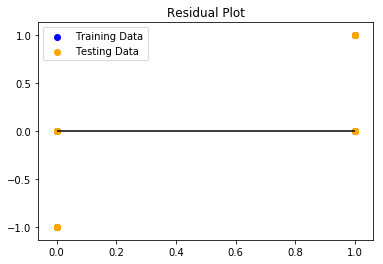

In [23]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, color='blue', label='Training Data')
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, color='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title('Residual Plot')